# Personal Questions:

Which Marvel movies (if any) pass the Bechdel test? 
How often do female characters speak in comparison to their male counterparts?
How often are certain catchphrases repeated, and by which character(s)?
Tony Stark saying “I am Iron Man”, Captain America saying “I can do this all day”, Conversation between Sam and Steve “On your left”, “Avengers Assemble”
How many MCU actors are Oscar winners? Does that affect their amount of their number of lines?

## Personal Question: How many MCU actors are Oscar winners? Does that affect the amount of their lines?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dialogue = pd.read_csv("../data/marvel-dialogue-nlp/data/mcu.csv")
oscar = pd.read_csv("../data/the_oscar_award.csv")

In [2]:
dialogue = pd.DataFrame(dialogue, columns=['character', 'line', 'movie', 'year'])
dialogue

,character,line,movie,year
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008
3,RAMIREZ,I think they’re intimidated.,Iron Man,2008
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008
...,...,...,...,...
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame,2019
15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame,2019
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame,2019
15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame,2019


In [3]:
oscar

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [4]:
actors = ['Jeff Bridges', 'Gwyneth Paltrow', 'William Hurt', 'Sam Rockwell', 'Natalie Portman', 'Anthony Hopkins', 'Tommy Lee Jones', 'Ben Kingsley', 'Robert Redford', 'Benicio del Toro', 'Michael Douglas', 'Marisa Tomei', 'Tilda Swinton', 'Jennifer Connelly', 'Cate Blanchett', 'Matt Damon', 'Taika Waititi', 'Forest Whitaker', 'Lupita Nyong’o', 'Daniel Kaluuya', 'Kenneth Branagh', 'Brie Larson', 'Rachel Weisz', 'Angelina Jolie', 'Jamie Foxx', 'F. Murray Abraham', 'Mahershala Ali', 'Christian Bale', 'Russell Crowe', 'Olivia Colman', 'Riz Ahmed', 'Jared Leto']
#According to https://collider.com/mcu-actors-who-have-won-oscars-natalie-portman-benicio-del-toro/
actors_map = {
    'Jeff Bridges': 'OBADIAH STANE',
    'Gwyneth Paltrow': 'PEPPER POTTS',
    'William Hurt': 'SECRETARY ROSS',
    'Sam Rockwell': 'JUSTIN HAMMER',
    'Natalie Portman': 'JANE FOSTER',
    'Anthony Hopkins': 'ODIN',
    'Tommy Lee Jones': 'COL. CHESTER PHILLIPS',
    'Ben Kingsley': 'THE MANDARIN',
    'Robert Redford': 'ALEXANDER PIERCE',
    'Benicio del Toro': 'THE COLLECTOR',
    'Michael Douglas': 'HANK PYM',
    'Marisa Tomei': 'MAY PARKER',
    'Tilda Swinton': 'ANCIENT ONE',
    'Jennifer Connelly': 'KAREN',
    'Cate Blanchett': 'HELA',
    'Matt Damon': 'ACTOR LOKI',
    'Taika Waititi': 'KORG',
    'Forest Whitaker': 'ZURI',
    'Lupita Nyong’o': 'NAKIA',
    'Daniel Kaluuya': 'W\'KABI',
    'Brie Larson': 'CAROL DANVERS',
}
#W’KABI

In [65]:
actchar=[key+' as '+actors_map[key] for key in actors_map.keys()]
actchar_map = {item.split(' as ')[1]: item for item in actchar}
actchar_map

{'OBADIAH STANE': 'Jeff Bridges as OBADIAH STANE',
 'PEPPER POTTS': 'Gwyneth Paltrow as PEPPER POTTS',
 'SECRETARY ROSS': 'William Hurt as SECRETARY ROSS',
 'JUSTIN HAMMER': 'Sam Rockwell as JUSTIN HAMMER',
 'JANE FOSTER': 'Natalie Portman as JANE FOSTER',
 'ODIN': 'Anthony Hopkins as ODIN',
 'COL. CHESTER PHILLIPS': 'Tommy Lee Jones as COL. CHESTER PHILLIPS',
 'THE MANDARIN': 'Ben Kingsley as THE MANDARIN',
 'ALEXANDER PIERCE': 'Robert Redford as ALEXANDER PIERCE',
 'THE COLLECTOR': 'Benicio del Toro as THE COLLECTOR',
 'HANK PYM': 'Michael Douglas as HANK PYM',
 'MAY PARKER': 'Marisa Tomei as MAY PARKER',
 'ANCIENT ONE': 'Tilda Swinton as ANCIENT ONE',
 'KAREN': 'Jennifer Connelly as KAREN',
 'HELA': 'Cate Blanchett as HELA',
 'ACTOR LOKI': 'Matt Damon as ACTOR LOKI',
 'KORG': 'Taika Waititi as KORG',
 'ZURI': 'Forest Whitaker as ZURI',
 'NAKIA': 'Lupita Nyong’o as NAKIA',
 "W'KABI": "Daniel Kaluuya as W'KABI",
 'CAROL DANVERS': 'Brie Larson as CAROL DANVERS'}

In [6]:
dialogue

,character,line,movie,year
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008
3,RAMIREZ,I think they’re intimidated.,Iron Man,2008
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008
...,...,...,...,...
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame,2019
15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame,2019
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame,2019
15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame,2019


In [7]:
character_lines = dialogue['character'].value_counts()
character_lines

TONY STARK                1788
STEVE ROGERS               977
THOR                       863
PETER PARKER               551
NATASHA ROMANOFF           498
                          ... 
PUSHY TABLOID REPORTER       1
FRIEND                       1
HOSPITAL NEWS REPORTER       1
DODC CENTRAL                 1
MUFFLED VOICE                1
Name: character, Length: 652, dtype: int64

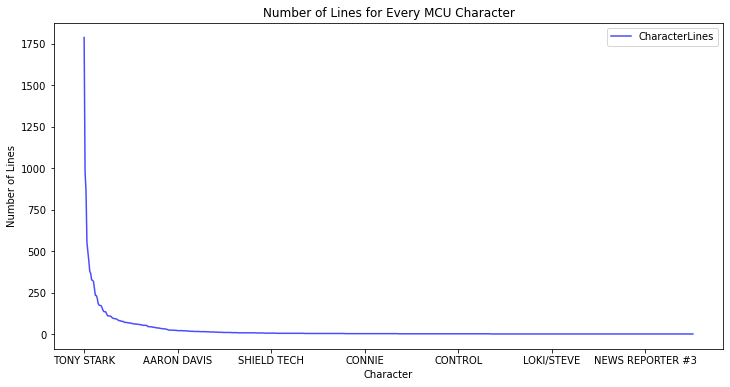

In [8]:
plt.figure(figsize=(12, 6))
character_lines.plot(color='blue', alpha=0.7, label='CharacterLines')
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines for Every MCU Character')
plt.legend()
plt.show()

In [9]:
character_lines = dialogue['character'].value_counts()
lines_tot = len(dialogue)
characters_tot = len(character_lines)
print('There are ' + str(characters_tot) + ' characters in the entire MCU. Their dialogue consists of ' + str(lines_tot) + ' lines of dialogue.')

There are 652 characters in the entire MCU. Their dialogue consists of 15724 lines of dialogue.


In [10]:
character_lines[0:int(characters_tot*0.2)]

TONY STARK          1788
STEVE ROGERS         977
THOR                 863
PETER PARKER         551
NATASHA ROMANOFF     498
                    ... 
HOGUN                 15
SKURGE                15
EITRI                 15
T'CHAKA               15
MR. HARRINGTON        15
Name: character, Length: 130, dtype: int64

In [11]:
perc = 100*(character_lines[:int(characters_tot*0.2)].sum())/lines_tot

In [12]:
print("Testing if the MCU dailogue follow the \"80, 20 rule\":" +
      "\nTop 20% of the character with the most amount of lines, from " + character_lines.index[0] + " to " + character_lines.index[int(characters_tot*0.2) - 1] +
      " is responsible for " + str(round(perc, 2)) + "% of the total lines in the MCU.")

Testing if the MCU dailogue follow the "80, 20 rule":
Top 20% of the character with the most amount of lines, from TONY STARK to MR. HARRINGTON is responsible for 89.88% of the total lines in the MCU.


In [13]:
mcu_oscar = []
mcu_oscar = oscar[oscar['name'].isin(actors)].copy()
mcu_oscar.drop(mcu_oscar[mcu_oscar['year_film'] > 2019].index,axis=0, inplace=True)
mcu_oscar['role'] = mcu_oscar['name'].map(actors_map.get)

In [14]:
mcu_oscar['first_year'] = mcu_oscar.groupby(mcu_oscar['year_ceremony'])['year_ceremony'].transform('min')
temp = mcu_oscar[['role','first_year']]
temp.drop_duplicates(inplace=True)

/tmp/ipykernel_2679365/620029570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop_duplicates(inplace=True)


In [15]:
oscar_map = temp.set_index('role')['first_year'].to_dict()

In [16]:
oscar_map

{'OBADIAH STANE': 2017,
 'ALEXANDER PIERCE': 1995,
 'THE MANDARIN': 2004,
 None: 2019,
 'SECRETARY ROSS': 2006,
 'HANK PYM': 1988,
 'ODIN': 2020,
 'COL. CHESTER PHILLIPS': 2013,
 'MAY PARKER': 2009,
 'ACTOR LOKI': 2016,
 'HELA': 2016,
 'PEPPER POTTS': 1999,
 'KAREN': 2002,
 'JANE FOSTER': 2017,
 'ZURI': 2007,
 'ANCIENT ONE': 2008,
 'CAROL DANVERS': 2016,
 "W'KABI": 2018,
 'JUSTIN HAMMER': 2019}

In [17]:
def check_after_oscar(row):
    character = row['character']
    year = row['year']
    
    if character in oscar_map and oscar_map[character] < year:
        return True
    else:
        return False

# Assuming your DataFrame is named 'dialogue'
dialogue['after_oscar'] = dialogue.apply(check_after_oscar, axis=1)

dialogue[dialogue['after_oscar'] == True]

,character,line,movie,year,after_oscar
35,PEPPER POTTS,"Tony, it’s the President. Wants to congratula...",Iron Man,2008,True
37,PEPPER POTTS,You’re leaving the country for a week. I need...,Iron Man,2008,True
39,PEPPER POTTS,The Board meeting is on the eleventh. Should ...,Iron Man,2008,True
58,PEPPER POTTS,"Don’t worry, that’s Jarvis -- he runs the hous...",Iron Man,2008,True
60,PEPPER POTTS,Cab’s waiting outside.,Iron Man,2008,True
...,...,...,...,...,...
15627,PEPPER POTTS,"Hang on, kid. I’ve got you.",Avengers: Endgame,2019,True
15636,CAROL DANVERS,Roger...Rogers...,Avengers: Endgame,2019,True
15639,CAROL DANVERS,"Hey, Peter Parker. You got something for me?",Avengers: Endgame,2019,True
15648,PEPPER POTTS,"Hey, Friday, what’ve we got?",Avengers: Endgame,2019,True


In [18]:
# Group by 'Character' and count the number of occurrences
#character_lines = dialogue['character'].value_counts()
# lines_before_oscar = dialogue[dialogue['after_oscar'] == False]
# lines_after_oscar = dialogue[dialogue['after_oscar'] == True]
# lines_before_counts = lines_before_oscar['character'].value_counts()
# lines_after_counts = lines_after_oscar['character'].value_counts()
lines_before_counts = dialogue[dialogue['after_oscar'] == False]['character'].value_counts()
lines_after_counts = dialogue[dialogue['after_oscar'] == True]['character'].value_counts()
lines_after_counts

PEPPER POTTS        442
CAROL DANVERS       234
HANK PYM            146
KAREN                67
ALEXANDER PIERCE     60
MAY PARKER           45
HELA                 32
SECRETARY ROSS       24
ZURI                 21
THE MANDARIN         16
ANCIENT ONE          16
ACTOR LOKI           11
JANE FOSTER           2
Name: character, dtype: int64

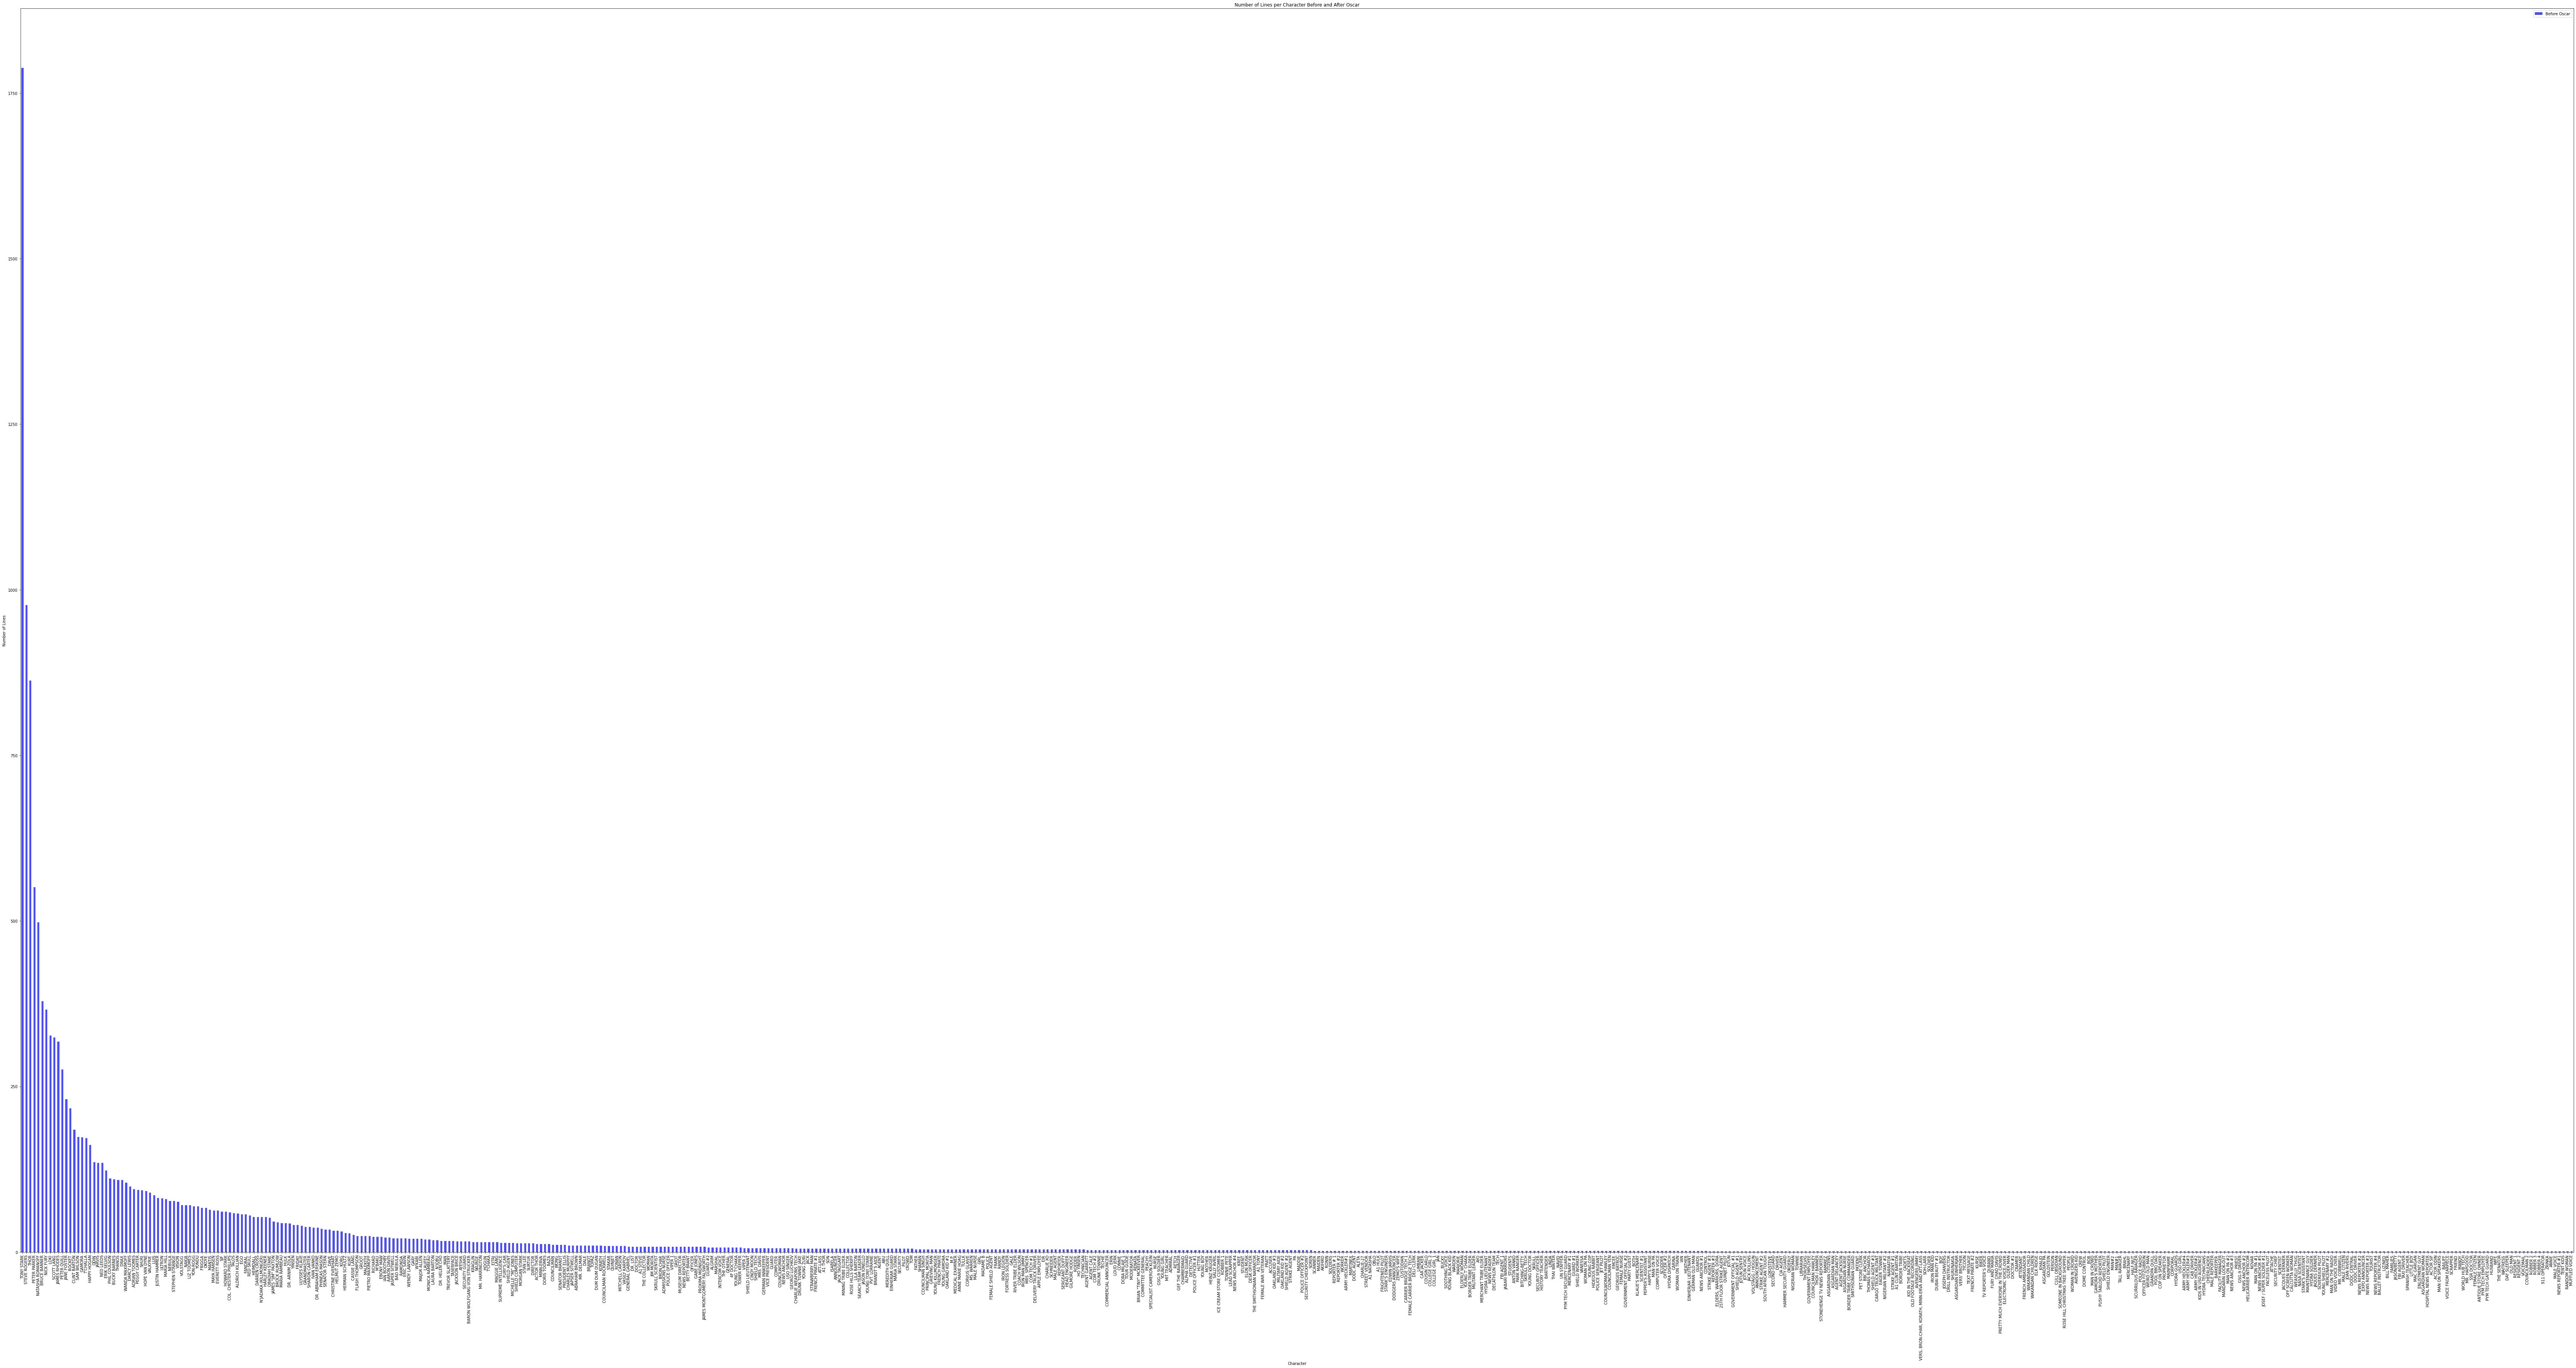

In [19]:
plt.figure(figsize=(120, 60))
lines_before_counts.plot(kind='bar', color='blue', alpha=0.7, label='Before Oscar')
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines per Character Before and After Oscar')
plt.legend()
plt.show()

In [20]:
lines_after_oscar = dialogue[dialogue['after_oscar'] == True]
lines_after_counts = lines_after_oscar['character'].value_counts()

lines_before_oscar = dialogue[dialogue['after_oscar'] == False]
lines_before_counts = lines_before_oscar['character'].value_counts()
lines_after_counts

PEPPER POTTS        442
CAROL DANVERS       234
HANK PYM            146
KAREN                67
ALEXANDER PIERCE     60
MAY PARKER           45
HELA                 32
SECRETARY ROSS       24
ZURI                 21
THE MANDARIN         16
ANCIENT ONE          16
ACTOR LOKI           11
JANE FOSTER           2
Name: character, dtype: int64

In [21]:
dialogue

,character,line,movie,year,after_oscar
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,False
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,False
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,False
3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,False
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,False
...,...,...,...,...,...
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame,2019,False
15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame,2019,False
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame,2019,False
15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame,2019,False


In [22]:
dialogue[dialogue['character']=='JANE FOSTER']

,character,line,movie,year,after_oscar
1677,JANE FOSTER,Hurry! Oh-- watch your head.,Thor,2011,False
1679,JANE FOSTER,It's a little different each time. Once it loo...,Thor,2011,False
1681,JANE FOSTER,"Hey, Darcy. Pass up the bubbly and my gloves, ...",Thor,2011,False
1683,JANE FOSTER,Thank you.,Thor,2011,False
1685,JANE FOSTER,The benefit of the doubt. It's never taken thi...,Thor,2011,False
...,...,...,...,...,...
5774,JANE FOSTER,You told your dad about me?,Thor: The Dark World,2013,False
5798,JANE FOSTER,You're…,Thor: The Dark World,2013,False
5800,JANE FOSTER,That was for New York!,Thor: The Dark World,2013,False
15093,JANE FOSTER,"Um, do you have anything with...pants?",Avengers: Endgame,2019,True


In [23]:
dialogue['role'] = dialogue['character'].map(actchar_map.get)
dialogue['role'][:15095]

0                                  None
1                                  None
2                                  None
3                                  None
4                                  None
                      ...              
15090                              None
15091      Tilda Swinton as ANCIENT ONE
15092                              None
15093    Natalie Portman as JANE FOSTER
15094                              None
Name: role, Length: 15095, dtype: object

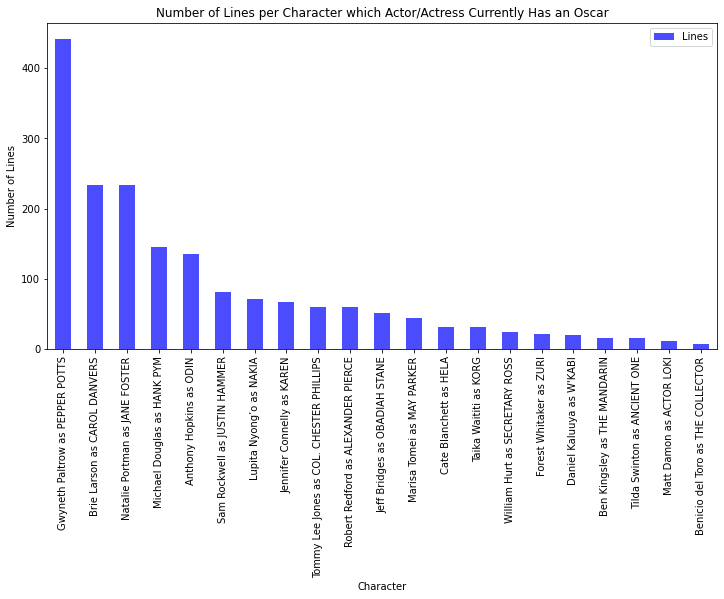

In [24]:
oscar_winners_dialogue = dialogue[dialogue['role'] != 'None']
oscar_winners_dialogue_count = oscar_winners_dialogue['role'].value_counts()
plt.figure(figsize=(12, 6))
oscar_winners_dialogue_count.plot(kind='bar', color='blue', alpha=0.7, label='Lines')
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines per Character which Actor/Actress Currently Has an Oscar')
plt.legend()
plt.show()

In [25]:
owd = pd.DataFrame(columns=['role', 'before_oscar', 'after_oscar'])
actchar_df = pd.DataFrame(actchar_map.items(), columns=['role', 'actor'])
owd = pd.concat([owd, actchar_df], ignore_index=True)

lines_before_oscar = dialogue[dialogue['after_oscar'] == False]
boc_dict = pd.DataFrame(lines_before_oscar['role'].value_counts()).to_dict('index')

lines_after_oscar = dialogue[dialogue['after_oscar'] == True]
aoc_dict = pd.DataFrame(lines_after_oscar['role'].value_counts()).to_dict('index')


aoc_dict

{'Gwyneth Paltrow as PEPPER POTTS': {'role': 442},
 'Brie Larson as CAROL DANVERS': {'role': 234},
 'Michael Douglas as HANK PYM': {'role': 146},
 'Jennifer Connelly as KAREN': {'role': 67},
 'Robert Redford as ALEXANDER PIERCE': {'role': 60},
 'Marisa Tomei as MAY PARKER': {'role': 45},
 'Cate Blanchett as HELA': {'role': 32},
 'William Hurt as SECRETARY ROSS': {'role': 24},
 'Forest Whitaker as ZURI': {'role': 21},
 'Ben Kingsley as THE MANDARIN': {'role': 16},
 'Tilda Swinton as ANCIENT ONE': {'role': 16},
 'Matt Damon as ACTOR LOKI': {'role': 11},
 'Natalie Portman as JANE FOSTER': {'role': 2}}

In [26]:
def get_count(s, d):
    if s in d.keys():
        return d[s]['role']
    else:
        return 0

In [27]:
owd['before_oscar'] = owd['actor'].apply(lambda x: get_count(x, boc_dict))
owd['after_oscar'] = owd['actor'].apply(lambda x: get_count(x, aoc_dict))

In [28]:
owd

,role,before_oscar,after_oscar,actor
0,OBADIAH STANE,52,0,Jeff Bridges as OBADIAH STANE
1,PEPPER POTTS,0,442,Gwyneth Paltrow as PEPPER POTTS
2,SECRETARY ROSS,0,24,William Hurt as SECRETARY ROSS
3,JUSTIN HAMMER,82,0,Sam Rockwell as JUSTIN HAMMER
4,JANE FOSTER,231,2,Natalie Portman as JANE FOSTER
5,ODIN,136,0,Anthony Hopkins as ODIN
6,COL. CHESTER PHILLIPS,60,0,Tommy Lee Jones as COL. CHESTER PHILLIPS
7,THE MANDARIN,0,16,Ben Kingsley as THE MANDARIN
8,ALEXANDER PIERCE,0,60,Robert Redford as ALEXANDER PIERCE
9,THE COLLECTOR,8,0,Benicio del Toro as THE COLLECTOR


In [29]:
owd['sum_oscar'] = owd.before_oscar + owd.after_oscar

In [30]:
owd = owd.sort_values(by='sum_oscar', ascending=False)

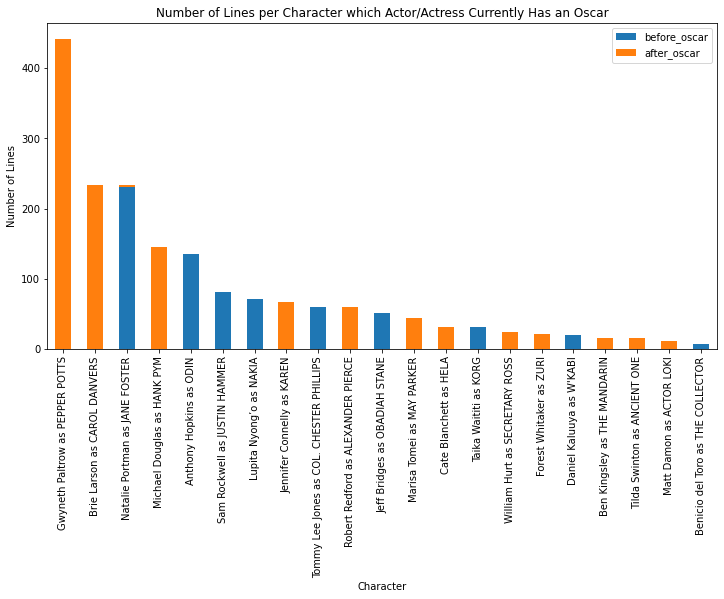

In [31]:
plot = owd[['actor','before_oscar',"after_oscar"]].plot(stacked=True,kind='bar',figsize=(12,6))
plot.set_xticklabels(owd['actor']);
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines per Character which Actor/Actress Currently Has an Oscar')
plt.legend()
plt.show()

In [32]:
num_bo = (owd['before_oscar'] != 0).sum()
print("The number award-winning of actor/actress that had lines in the dialogue befoer they have won an Oscar is: " + str(num_bo))

The number award-winning of actor/actress that had lines in the dialogue befoer they have won an Oscar is: 9


In [33]:
num_ao = (owd['after_oscar'] != 0).sum()
print("The number of award-winning actor/actress that had lines in the dialogue after they have won an Oscar is: " + str(num_ao))

The number of award-winning actor/actress that had lines in the dialogue after they have won an Oscar is: 13


In [61]:
owd['actor'][(owd['after_oscar'] != 0) & (owd['before_oscar'] != 0)].values[0]

'Natalie Portman as JANE FOSTER'

In [64]:
portman = owd['actor'][(owd['after_oscar'] != 0) & (owd['before_oscar'] != 0)].values[0]
print("The only actress that had lines in the dialogue both before and after they have won an Oscar is " + portman +
      " with " + str(owd['before_oscar'][(owd['after_oscar'] != 0) & (owd['before_oscar'] != 0)].values[0]) + " lines before she has won an Oscar and " + 
      str(owd['after_oscar'][(owd['after_oscar'] != 0) & (owd['before_oscar'] != 0)].values[0]) + " lines after she has won an Oscar.")

The only actress that had lines in the dialogue both before and after they have won an Oscar is Natalie Portman as JANE FOSTER with 231 lines before she has won an Oscar and 2 lines after she has won an Oscar.


In [35]:
owd

,role,before_oscar,after_oscar,actor,sum_oscar
1,PEPPER POTTS,0,442,Gwyneth Paltrow as PEPPER POTTS,442
20,CAROL DANVERS,0,234,Brie Larson as CAROL DANVERS,234
4,JANE FOSTER,231,2,Natalie Portman as JANE FOSTER,233
10,HANK PYM,0,146,Michael Douglas as HANK PYM,146
5,ODIN,136,0,Anthony Hopkins as ODIN,136
3,JUSTIN HAMMER,82,0,Sam Rockwell as JUSTIN HAMMER,82
18,NAKIA,71,0,Lupita Nyong’o as NAKIA,71
13,KAREN,0,67,Jennifer Connelly as KAREN,67
6,COL. CHESTER PHILLIPS,60,0,Tommy Lee Jones as COL. CHESTER PHILLIPS,60
8,ALEXANDER PIERCE,0,60,Robert Redford as ALEXANDER PIERCE,60


In [36]:
character_lines_oscar_df = owd[['role','sum_oscar']]
character_lines_oscar = character_lines_oscar_df.set_index('role')
lines_tot_oscar = owd['sum_oscar'].sum()
characters_tot_oscar = len(character_lines_oscar)
print('There are ' + str(characters_tot_oscar) + ' characters who are Oscar winners in the entire MCU. Their dialogue consists of ' + str(lines_tot_oscar) + ' lines of dialogue.')

There are 21 characters who are Oscar winners in the entire MCU. Their dialogue consists of 1807 lines of dialogue.


In [37]:
character_lines_oscar

,sum_oscar
role,
PEPPER POTTS,442
CAROL DANVERS,234
JANE FOSTER,233
HANK PYM,146
ODIN,136
JUSTIN HAMMER,82
NAKIA,71
KAREN,67
COL. CHESTER PHILLIPS,60


In [38]:
character_lines_oscar.sum_oscar

role
PEPPER POTTS             442
CAROL DANVERS            234
JANE FOSTER              233
HANK PYM                 146
ODIN                     136
JUSTIN HAMMER             82
NAKIA                     71
KAREN                     67
COL. CHESTER PHILLIPS     60
ALEXANDER PIERCE          60
OBADIAH STANE             52
MAY PARKER                45
HELA                      32
KORG                      31
SECRETARY ROSS            24
ZURI                      21
W'KABI                    20
THE MANDARIN              16
ANCIENT ONE               16
ACTOR LOKI                11
THE COLLECTOR              8
Name: sum_oscar, dtype: int64

In [49]:
perc_oscar = 100*(character_lines_oscar[:int(characters_tot_oscar*0.2)].sum())/lines_tot_oscar
print("Testing if the MCU dailogue follow the \"80, 20 rule\":" +
      "\nTop 20% of the character with the most amount of lines, from " + character_lines_oscar.index[0] + " to " + character_lines_oscar.index[int(characters_tot_oscar*0.2) - 1] +
      " is responsible for " + str(round(perc_oscar[0], 2)) + "% of the total lines in the MCU.")

Testing if the MCU dailogue follow the "80, 20 rule":
Top 20% of the character with the most amount of lines, from PEPPER POTTS to HANK PYM is responsible for 58.38% of the total lines in the MCU.


In [40]:
print("There are totally " + str(characters_tot) + " actor/actress in the entire MCU, of which " + 
      str(characters_tot_oscar) + " actor/actress are Oscar winners.\n" +
      "That is " + str((round(100*characters_tot_oscar/characters_tot, 2))) + "% of the actor/actress in the entire MCU")

There are totally 652 actor/actress in the entire MCU, of which 21 actor/actress are Oscar winners.
That is 3.22% of the actor/actress in the entire MCU


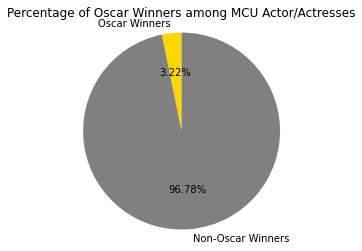

In [41]:
# Calculate the percentage of Oscar winners
p_percentage = (characters_tot_oscar / characters_tot) * 100

# Calculate the percentage of non-Oscar winners
non_oscar_p = characters_tot - characters_tot_oscar
non_oscar_p_percentage = 100 - p_percentage

# Data for the pie chart
labels = ['Oscar Winners', 'Non-Oscar Winners']
sizes = [p_percentage, non_oscar_p_percentage]
colors = ['#FFD700', '#808080']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Percentage of Oscar Winners among MCU Actor/Actresses')

# Display the pie chart
plt.show()

In [42]:
lines = len(dialogue)
lines_oscar = owd['sum_oscar'].sum()

In [43]:
print("There are totally " + str(lines) + " lines in the entire MCU dialogue, of which " + 
      str(lines_oscar) + " lines are said by Oscar winners.\n" +
      "That is " + str((round(100*lines_oscar/lines, 2))) + "% of the lines in the entire MCU dialogue")

There are totally 15724 lines in the entire MCU dialogue, of which 1807 lines are said by Oscar winners.
That is 11.49% of the lines in the entire MCU dialogue


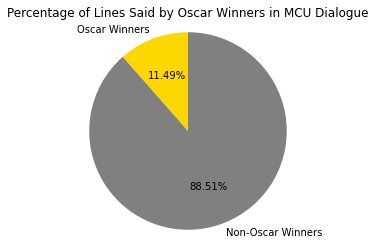

In [46]:
# Calculate the percentage of lines said by Oscar winners
percentage = (lines_oscar / lines) * 100

# Calculate the percentage of lines said by non-Oscar winners
non_oscar_lines = lines - lines_oscar
non_oscar_percentage = 100 - percentage

# Data for the pie chart
labels = ['Oscar Winners', 'Non-Oscar Winners']
sizes = [percentage, non_oscar_percentage]
colors = ['#FFD700', '#808080']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Percentage of Lines Said by Oscar Winners in MCU Dialogue')

# Display the pie chart
plt.show()